In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

In [2]:
import os
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers, Model
import pathlib
from tensorflow.keras import Input
import numpy as np
from tensorflow.keras.layers import Lambda, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.metrics import MeanIoU

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [29]:
image_dir = '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images'
mask_dir = '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target'

In [5]:
def process_path(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image = tf.image.decode_png(image, channels = 3)
    mask = tf.image.decode_png(mask, channels = 1)
    return image, mask

In [6]:
def batch_data (path_X, path_y, batch_size):
    X_names = os.listdir(path_X)
    X_path = [f'{path_X}/{file}' for file in X_names]
    y_names = os.listdir(path_y)
    y_path = [f'{path_y}/{file}' for file in y_names]
    ds_train = tf.data.Dataset.from_tensor_slices((X_path, y_path))
    return ds_train.map(process_path).batch(batch_size)

In [27]:
pwd

'/home/zhlj/code/solar_panel_segmentation/tests'

In [31]:
image_dir

'/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images'

In [33]:
X_names = os.listdir(image_dir)
X_names

['vienna1.tif_4484_3304.png',
 'kitsap1.tif_2360_1652.png',
 'austin1.tif_3068_2124.png',
 'tyrol-w1.tif_236_1180.png',
 'kitsap1.tif_3776_4012.png',
 'kitsap1.tif_1652_3304.png',
 'chicago1.tif_3068_4012.png',
 'kitsap1.tif_4248_3068.png',
 'chicago1.tif_4248_944.png',
 'kitsap1.tif_2832_472.png',
 'austin1.tif_3540_3304.png',
 'chicago1.tif_4012_1888.png',
 'kitsap1.tif_3776_0.png',
 'chicago1.tif_4720_4484.png',
 'chicago1.tif_1888_708.png',
 'vienna1.tif_3304_944.png',
 'kitsap1.tif_2360_4012.png',
 'kitsap1.tif_4484_2360.png',
 'tyrol-w1.tif_3068_3540.png',
 'austin1.tif_4720_944.png',
 'kitsap1.tif_2124_4012.png',
 'austin1.tif_3540_2596.png',
 'vienna1.tif_3540_4484.png',
 'chicago1.tif_4720_1888.png',
 'chicago1.tif_708_3540.png',
 'vienna1.tif_4012_4012.png',
 'kitsap1.tif_1888_2832.png',
 'chicago1.tif_3068_4248.png',
 'tyrol-w1.tif_4012_0.png',
 'chicago1.tif_236_944.png',
 'austin1.tif_2832_1888.png',
 'tyrol-w1.tif_3068_2124.png',
 'austin1.tif_708_2124.png',
 'vienna1.tif

In [38]:
y_names = os.listdir(mask_dir)
y_path = [f'{mask_dir}/{file}' for file in y_names]
y_path

['/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/vienna1.tif_4484_3304.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/kitsap1.tif_2360_1652.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/austin1.tif_3068_2124.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/tyrol-w1.tif_236_1180.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/kitsap1.tif_3776_4012.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/kitsap1.tif_1652_3304.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/chicago1.tif_3068_4012.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/kitsap1.tif_4248_3068.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/chicago1.tif_4248_944.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Target/kitsap1.tif_2832_472.png',
 '/home/zhlj/code/so

In [35]:
X_path = [f'{image_dir}/{file}' for file in X_names]
X_path

['/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/vienna1.tif_4484_3304.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/kitsap1.tif_2360_1652.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/austin1.tif_3068_2124.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/tyrol-w1.tif_236_1180.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/kitsap1.tif_3776_4012.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/kitsap1.tif_1652_3304.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/chicago1.tif_3068_4012.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/kitsap1.tif_4248_3068.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/chicago1.tif_4248_944.png',
 '/home/zhlj/code/solar_panel_segmentation/tests/Small_dataset/Images/kitsap1.tif_2832_472.png',
 '/home/zhlj/code/so

In [39]:
ds_train = tf.data.Dataset.from_tensor_slices((X_path, y_path))

In [40]:
ds_train = ds_train.map(process_path).batch(5)

In [41]:
ds_train

<BatchDataset shapes: ((None, None, None, 3), (None, None, None, 1)), types: (tf.uint8, tf.uint8)>

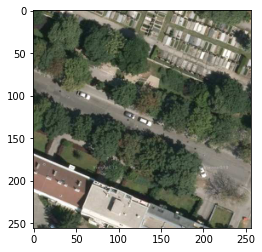

(5, 256, 256, 1)


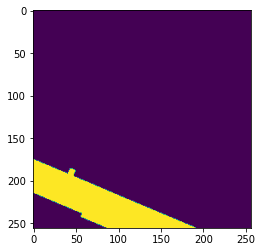

In [47]:
for (l, k) in ds_train:
    plt.imshow(l[0])
    plt.show()
    plt.imshow(k[0])
    print(k.shape)
    break

In [30]:
tmp = batch_data(image_dir, mask_dir, 5)
tmp


<BatchDataset shapes: ((None, None, None, 3), (None, None, None, 1)), types: (tf.uint8, tf.uint8)>

In [7]:
# if y_batch equals to 0, than it is training image, otherwise it is mask image
#mask image has been extended to 3 channels, each channel is same

In [8]:
X1 = plt.imread("./IMAGE/vienna30.tif")
y1 = plt.imread("./MASK/vienna30.tif")

In [9]:
X2 = plt.imread("./IMAGE/vienna31.tif")
y2 = plt.imread("./MASK/vienna31.tif")

In [10]:
X3 = plt.imread("./IMAGE/vienna32.tif")
y3 = plt.imread("./MASK/vienna32.tif")

In [11]:
X4 = plt.imread("./IMAGE/vienna33.tif")
y4 = plt.imread("./MASK/vienna33.tif")

In [12]:
X1.shape

(5000, 5000, 3)

In [13]:
X_train = np.array([X1,X2,X3])
y_train = np.array([y1,y2,y3])
X_test = np.array([X4])
y_test = np.array([y4])

In [14]:
X_train.shape

(3, 5000, 5000, 3)

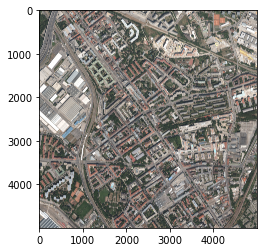

In [15]:
plt.imshow(X1)

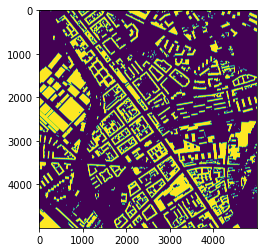

In [16]:
plt.imshow(y1)

In [17]:
X_train_tmp = X_train[:,:256,:256,:]
X_test_tep = X_test[:,:256,:256,:]

In [18]:
from tensorflow.keras import models, layers

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(16,8,padding='same',activation = 'relu', input_shape = X_train_tmp.shape[1:4]))
model.add(layers.Conv2D(32,8,padding='same',activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32,4,padding='same',activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,4,padding='same',activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.Conv2D(128,4,activation = 'relu'))
#model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.Conv2D(2,4,activation = 'relu'))

#flatten layer
#model.add(layers.Flatten())
model.add(layers.Conv2DTranspose(2, kernel_size = 8, strides = 8))
#model.add(layers.UpSampling2D())
#Dense layer

#model.add(layers.Dense(2, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics='accuracy')

model.summary()

2022-11-30 01:19:08.756216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-30 01:19:08.858068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-30 01:19:08.859042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-30 01:19:08.860488: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      3088      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      32800     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        3

In [20]:
y_train.shape

(3, 5000, 5000)

In [21]:
#model.fit(X_train_tmp, y_train[:,:256,:256]/255, epochs=5, batch_size = 1)

In [48]:
tf_data = batch_data(image_dir,mask_dir,10)

In [49]:
tf_data

<BatchDataset shapes: ((None, None, None, 3), (None, None, None, 1)), types: (tf.uint8, tf.uint8)>

In [ ]:
history = model.fit(tf_data, epochs=100)

Epoch 1/100


2022-11-30 01:32:38.960703: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.52GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


221/221 [==============================] - 40s 175ms/step - loss: -366652561966497792.0000 - accuracy: 0.0000e+00
Epoch 2/100
221/221 [==============================] - 39s 174ms/step - loss: -1841318313053913088.0000 - accuracy: 0.0000e+00
Epoch 3/100
221/221 [==============================] - 38s 174ms/step - loss: -6496743728667951104.0000 - accuracy: 0.0000e+00
Epoch 4/100
221/221 [==============================] - 38s 174ms/step - loss: -17767047975650983936.0000 - accuracy: 0.0000e+00
Epoch 5/100
221/221 [==============================] - 38s 174ms/step - loss: -40710952936638775296.0000 - accuracy: 0.0000e+00
Epoch 6/100
221/221 [==============================] - 38s 173ms/step - loss: nan - accuracy: 0.1342
Epoch 7/100
221/221 [==============================] - 38s 171ms/step - loss: nan - accuracy: 0.8923
Epoch 8/100
221/221 [==============================] - 38s 170ms/step - loss: nan - accuracy: 0.8923
Epoch 9/100
221/221 [==============================] - 38s 170ms/step - l